### Ансаблевые методы

In [139]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.datasets import make_blobs

In [140]:
#bagging - обучение
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = 2,cluster_std=3, random_state=42)
print(x.shape)
# генерация векторов

(1000, 2)


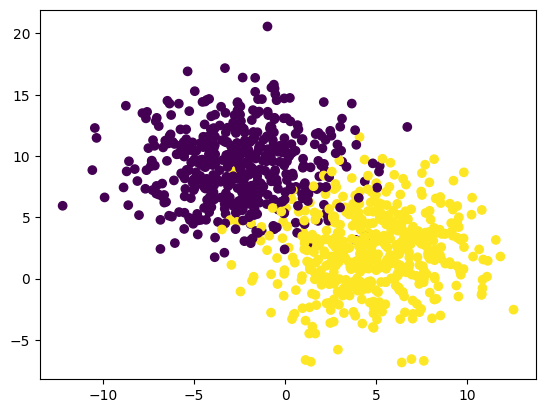

In [141]:
plt.scatter(x[:, 0], x[:, -1], c=y)
plt.show()

In [142]:
x = np.linspace(0, 10, 100)
x2 = x.copy()
np.random.shuffle(x2)
print('train: ', x2[:50])  # Рандомна взяли 50 элементов для обучающего датасета
print('test: ', x2[50:])

train:  [2.22222222 6.46464646 4.84848485 3.53535354 5.75757576 3.63636364
 3.83838384 7.07070707 1.21212121 2.02020202 0.80808081 7.97979798
 4.34343434 0.2020202  8.28282828 9.8989899  6.36363636 2.92929293
 2.32323232 5.85858586 3.43434343 2.62626263 0.50505051 3.03030303
 8.58585859 1.31313131 6.66666667 1.71717172 2.52525253 5.95959596
 9.09090909 2.82828283 0.         6.16161616 5.55555556 6.06060606
 7.67676768 3.73737374 8.98989899 9.39393939 1.81818182 0.70707071
 8.38383838 6.76767677 9.7979798  5.05050505 0.90909091 6.86868687
 7.37373737 5.35353535]
test:  [ 4.74747475  4.64646465  7.47474747  9.29292929  7.87878788  8.68686869
  4.04040404  2.12121212 10.          6.56565657  0.1010101   8.48484848
  1.61616162  7.57575758  4.24242424  9.49494949  4.54545455  0.4040404
  9.19191919  1.01010101  9.6969697   8.78787879  2.72727273  5.65656566
  4.94949495  2.42424242  7.17171717  5.25252525  8.88888889  4.14141414
  3.23232323  5.45454545  0.60606061  4.44444444  3.93939394 

In [143]:
x = np.linspace(0, 10, 100)
y = np.random.randint(0, 2, 100)
index = np.array(range(100))
np.random.shuffle(index)
x2 = x[index]
y2 = y[index]
print('train: ', x2[:50], y2[:50])
print('test: ', x2[50:])

train:  [7.87878788 1.71717172 5.85858586 5.65656566 4.24242424 3.83838384
 0.90909091 9.09090909 0.80808081 6.46464646 6.76767677 1.21212121
 7.57575758 8.38383838 0.3030303  9.29292929 2.82828283 4.64646465
 6.36363636 4.34343434 7.97979798 4.94949495 2.22222222 2.12121212
 1.11111111 5.95959596 8.48484848 2.62626263 3.33333333 8.08080808
 5.75757576 3.13131313 3.43434343 8.98989899 1.61616162 6.26262626
 9.19191919 3.63636364 2.72727273 4.54545455 6.56565657 5.25252525
 2.42424242 0.1010101  7.27272727 3.93939394 8.68686869 1.81818182
 9.6969697  9.8989899 ] [1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1]
test:  [ 5.45454545  5.15151515  8.28282828  0.50505051  6.96969697  5.35353535
  4.04040404  3.73737374  3.23232323  1.51515152  0.4040404   7.47474747
  6.16161616 10.          9.7979798   1.91919192  6.06060606  3.53535354
  1.31313131  7.17171717  0.          4.14141414  7.37373737  8.88888889
  1.41414141  7.67676768  6.66

In [144]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
# Тоже самое что и в прошлом блоке ток с использованием библиотеки
print(xtrain.shape, xtest.shape)

(75,) (25,)


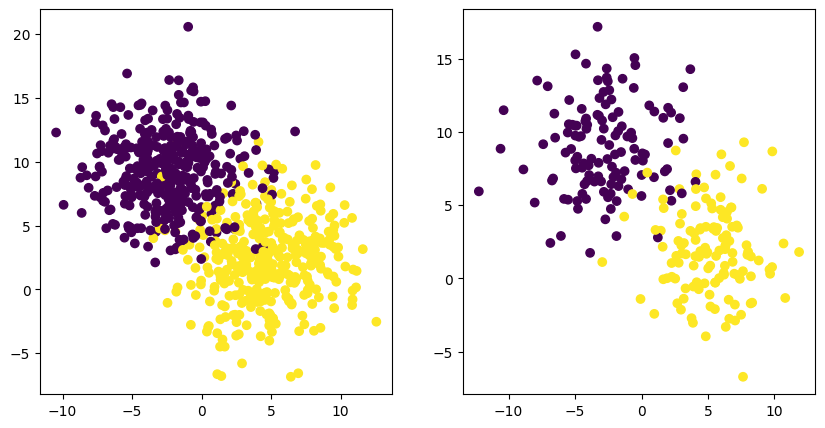

In [145]:
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = 2,cluster_std=3, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
fig , axs = plt.subplots(1, 2, figsize = (10, 5))

axs[1].scatter(xtest[:, 0], xtest[:, 1], c=ytest)
axs[0].scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
plt.show()

In [146]:
sc_opt = -1
n_opt = -1
for n in range(1, 100):
  clf = DecisionTreeClassifier()
  clf.fit(xtrain, ytrain)
  sc = clf.score(xtest, ytest)
  if sc > sc_opt:
    sc_opt = sc
    n_opt = n
print(n_opt, sc_opt)

3 0.944


In [147]:
x, y = make_blobs(n_samples = 3000, n_features = 2, centers = 2,cluster_std=3, random_state=42)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.25)
sc_opt = -1
n_opt = -1
for n in range(1, 100):
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  sc = clf.score(x_val, y_val)
  if sc > sc_opt:
    sc_opt = sc # Лучший скор для обучения 
    n_opt = n # Лучшая глубина дерева
print(sc_opt, n_opt)
clf = DecisionTreeClassifier(max_depth = n_opt)
clf.fit(x_train, y_train)
sc = clf.score(x_test, y_test)
print("score test: ", sc)

0.9466666666666667 38
score test:  0.9133333333333333


In [148]:
#Time-split - тестовые данные берётся сначало или с конца

In [149]:
# Классификатор

In [150]:
#Разобрать для чего какие деления используется
# Для чего обучающиеся, тестовые и валидационные

In [151]:
#Кроссвалидация

In [152]:
#Кроссвалидация kfold k - кол-во разделений
from sklearn.model_selection import cross_validate
x, y = make_blobs(n_samples = 3000, n_features = 2, centers = 2,cluster_std=3, random_state=42)

clf = DecisionTreeClassifier()
res = cross_validate(clf, x, y, return_train_score=True)
# по дефолту k = 5
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 2.*res['test_score'].std())
print(res['test_score'].mean() + 2.*res['test_score'].std())


{'fit_time': array([0.00698781, 0.00866508, 0.00725579, 0.00682139, 0.00674844]), 'score_time': array([0.00131631, 0.00106239, 0.00101519, 0.00090456, 0.00078583]), 'test_score': array([0.945     , 0.93833333, 0.925     , 0.94333333, 0.94      ]), 'train_score': array([1., 1., 1., 1., 1.])}
0.9383333333333332
0.9241911977096023
0.9524754689570641


In [153]:
res = cross_validate(clf, x, y, cv=10)
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 1.96*res['test_score'].std())
print(res['test_score'].mean() + 1.96*res['test_score'].std())

{'fit_time': array([0.01476693, 0.00901961, 0.00769043, 0.00705528, 0.00772405,
       0.00745988, 0.00775194, 0.00746703, 0.00711775, 0.00757909]), 'score_time': array([0.0010438 , 0.00078487, 0.00081944, 0.00067234, 0.00078106,
       0.00069547, 0.00080872, 0.00068069, 0.00078821, 0.00070167]), 'test_score': array([0.93      , 0.94333333, 0.94666667, 0.92333333, 0.92666667,
       0.92      , 0.93333333, 0.96      , 0.93666667, 0.92666667])}
0.9346666666666668
0.9118093352388732
0.9575239980944603


In [154]:
from sklearn.model_selection import ShuffleSplit
cvsk = ShuffleSplit()
res = cross_validate(clf, x, y, cv = cvsk)
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 1.96*res['test_score'].std())
print(res['test_score'].mean() + 1.96*res['test_score'].std())

{'fit_time': array([0.01001167, 0.00771356, 0.00746465, 0.00756383, 0.00809693,
       0.00735545, 0.0075407 , 0.00727153, 0.00755525, 0.00757194]), 'score_time': array([0.00104141, 0.00083113, 0.00085282, 0.00071359, 0.00076413,
       0.00075912, 0.00073886, 0.0008235 , 0.00068498, 0.00079823]), 'test_score': array([0.92666667, 0.95      , 0.94      , 0.96      , 0.96      ,
       0.95      , 0.92666667, 0.95333333, 0.95333333, 0.95333333])}
0.9473333333333332
0.9245508215217606
0.9701158451449059


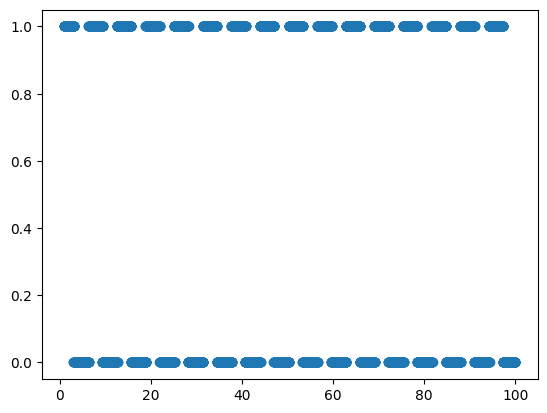

In [155]:
x=np.linspace(1,100,10000)
y=(np.sin(x)+np.random.rand(x.shape[0])*0.3>0.2).astype(int)

plt.scatter(x,y)

In [156]:
clf = DecisionTreeClassifier()
cvsk = ShuffleSplit()
y = y.astype(int)
x = x[:, np.newaxis]
res = cross_validate(clf, x, y, cv = cvsk)
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 1.96*res['test_score'].std())
print(res['test_score'].mean() + 1.96*res['test_score'].std())

{'fit_time': array([0.03569221, 0.03298426, 0.03295088, 0.03338432, 0.03302002,
       0.03305507, 0.03400946, 0.03315115, 0.03347492, 0.03386211]), 'score_time': array([0.00113177, 0.00083756, 0.00097322, 0.0010674 , 0.00105715,
       0.00109434, 0.0011127 , 0.00109863, 0.00103569, 0.00103736]), 'test_score': array([0.973, 0.964, 0.964, 0.972, 0.974, 0.97 , 0.975, 0.968, 0.971,
       0.966])}
0.9696999999999999
0.9622082861773823
0.9771917138226175


In [157]:
from sklearn.model_selection import TimeSeriesSplit
cvsk = TimeSeriesSplit()
res = cross_validate(clf, x, y, cv = cvsk)
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 1.96*res['test_score'].std())
print(res['test_score'].mean() + 1.96*res['test_score'].std())

{'fit_time': array([0.00360036, 0.00587201, 0.01081562, 0.02292538, 0.02854323]), 'score_time': array([0.00105   , 0.00107861, 0.00114489, 0.00111032, 0.00109673]), 'test_score': array([0.47779112, 0.40456182, 0.54321729, 0.52280912, 0.44597839])}
0.47887154861944775
0.3801842475569328
0.5775588496819627


In [158]:
from sklearn.model_selection import StratifiedKFold
cvsk = StratifiedKFold()
res = cross_validate(clf, x, y, cv = cvsk)
print(res)
print(res['test_score'].mean())
print(res['test_score'].mean() - 1.96*res['test_score'].std())
print(res['test_score'].mean() + 1.96*res['test_score'].std())

{'fit_time': array([0.03680491, 0.03002191, 0.02731419, 0.02626514, 0.03624129]), 'score_time': array([0.00130773, 0.00131536, 0.00117302, 0.00121546, 0.0020442 ]), 'test_score': array([0.493 , 0.5855, 0.6085, 0.579 , 0.528 ])}
0.5588
0.47625025393134146
0.6413497460686585


In [159]:
# BaggingClassifier
#Разобрать зачем нужен и как используется
from sklearn.ensemble import BaggingClassifier

x, y = make_blobs(n_samples = 3000, n_features = 2, centers = 2,cluster_std=3, random_state=42)
x_train, x_test, y_train, y_test  = train_test_split(x, y)

clf = tree.DecisionTreeClassifier(max_depth=2)
bagging_clf = BaggingClassifier(clf, n_estimators=10)
bagging_clf = bagging_clf.fit(x_train, y_train)
print(bagging_clf.score(x_test, y_test))

0.9506666666666667


In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, n_estimators= 10)
clf = clf.fit(x, y)
print(clf.score(x_test, y_test))

0.9653333333333334


In [170]:
# Stacking
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('t1', tree.DecisionTreeClassifier(max_depth=2)),
        ('t2', tree.DecisionTreeClassifier(max_depth=2)),
        ('t3', tree.DecisionTreeClassifier(max_depth=2)),
        ('t4', tree.DecisionTreeClassifier(max_depth=5))
    ],
    final_estimator=tree.DecisionTreeClassifier(max_depth = 1)
)
stacking_clf = stacking_clf.fit(xtrain, ytrain)
print(stacking_clf.score(xtest, ytest))
                              

0.94


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0)

clf.fit(xtrain, ytrain)
sc = clf.score(xtest, ytest)
print(f'sc = {sc}')


sc = 0.96
